In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import melt, pivot_table
import numpy as np
from datetime import datetime as dt
from datetime import timedelta

In [2]:
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# ⭐ 데이터 분포

## 🌱 문제 1

kings_life 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다.

수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [3]:
origin=load_data('kings_life')
origin.head()

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38


In [4]:
origin.describe()

,수명
count,27.000000
mean,46.037037
std,16.173296
min,16.000000
25%,33.000000
50%,45.000000
75%,56.000000
max,82.000000


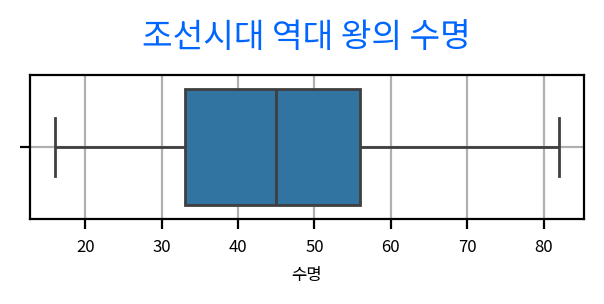

In [5]:
# 1. 그래프 초기화
width_px=600
height_px=300
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=origin['수명'], orient='h')

# 3. 그래프 꾸미기
ax.grid(True)
ax.set_title('조선시대 역대 왕의 수명', color='#0066ff', fontsize=12, fontweight=1000, pad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실

1. 조선시대 왕들은 일반 백성들보다 좋은 환경에도 지냈음에도, 평균 수명이 현대인들의 평균 수명보다 훨씬 적은 46세 정도로 나타나고 있다.
2. 평균이 중앙값보다 큰 것으로 보아 오른쪽으로 긴 꼬리 형태를 지니고 있음을 알 수 있다.

## 🌱 문제 2

stock 데이터셋은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.

외국 기업과 내국 기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [6]:
origin=load_data('stock')
origin.head()

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135


In [7]:
origin.groupby(origin['구분']).describe().T

구분                 F           K
주가 count   12.000000   12.000000
   mean   155.166667  150.833333
   std     27.764704   21.425700
   min    120.000000  102.000000
   25%    142.750000  142.500000
   50%    150.000000  154.000000
   75%    158.000000  166.250000
   max    235.000000  173.000000

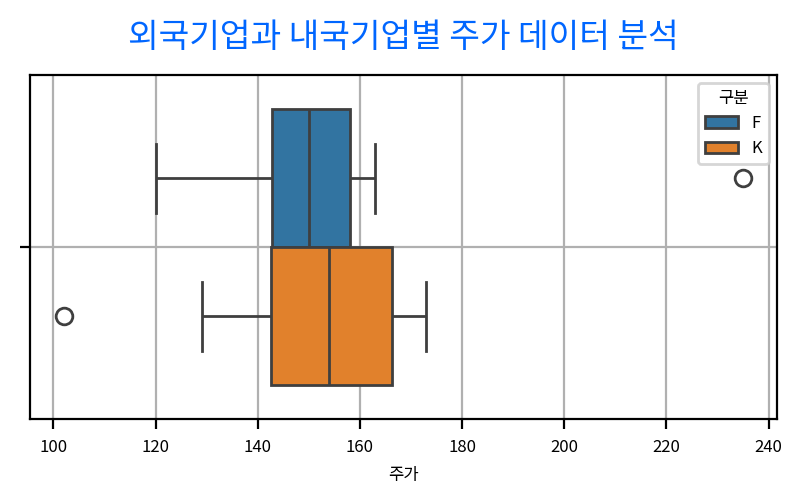

In [8]:
# 1. 그래프 초기화
width_px=800
height_px=500
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=origin, x='주가', hue='구분')

# 3. 그래프 꾸미기
ax.grid(True)
ax.set_title('외국기업과 내국기업별 주가 데이터 분석', color='#0066ff', fontsize=12, fontweight=1000, pad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실

1. 외국 기업의 경우에는 매우 높은 주가 데이터 이상치가, 내국 기업의 경우에는 매우 낮은 주가 데이터 이상치가 존재한다.
2. 외국 기업보다 내국 기업의 상자가 더 큰 것을 보아, 내국 기업의 주가 데이터 분포가 더 고르게 퍼져있음을 알 수 있다.
3. 외국 기업의 주가 데이터가 내국 기업의 주가 데이터보다 전체적으로 낮은 분포를 보여주고 있다.

## 🌱 문제 3

grape 데이터셋은 포도농장에서 수집한 비료 종류에 따른 수확량 자료이다.

비료 종류별로 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [9]:
origin=load_data('grape')
origin.head()

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8


In [10]:
origin.groupby(origin['비료종류']).describe().T

비료종류               A         B
수확량 count   7.000000   4.00000
    mean   26.357143  18.70000
    std     6.578211   6.17252
    min    17.900000  11.40000
    25%    23.950000  15.22500
    50%    24.300000  18.80000
    75%    27.550000  22.27500
    max    39.300000  25.80000

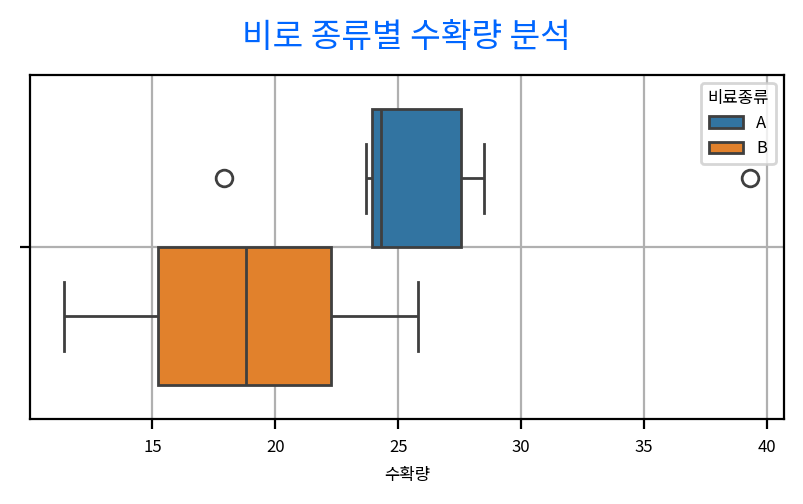

In [11]:
# 1. 그래프 초기화
width_px=800
height_px=500
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=origin, x='수확량', hue='비료종류')

# 3. 그래프 꾸미기
ax.grid(True)
ax.set_title('비로 종류별 수확량 분석', color='#0066ff', fontsize=12, fontweight=1000, pad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실

1. 전반적으로 비료 A가 비료 B보다 높은 수확량을 보여준다.
2. 비료 A의 수확량에 높은 이상치와 낮은 이상치가 존재하고 있다.
3. 비료 B의 평균과 중앙값이 유사한 수치를 보이는 것을 보아, 비료 B는 안정적으로 수확량을 확보할 수 있다고 보여진다.

## 🌱 문제 4

analysis_grade 데이터셋을 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다.

이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라.

최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [12]:
origin=load_data('analysis_grade')
origin.head()

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67


In [13]:
origin.groupby(origin['학과']).describe().T

학과                A          C
점수 count  20.000000  12.000000
   mean   43.750000  56.166667
   std    20.229928  14.689720
   min    10.000000  41.000000
   25%    29.500000  50.250000
   50%    42.500000  52.500000
   75%    55.000000  54.250000
   max    78.000000  90.000000

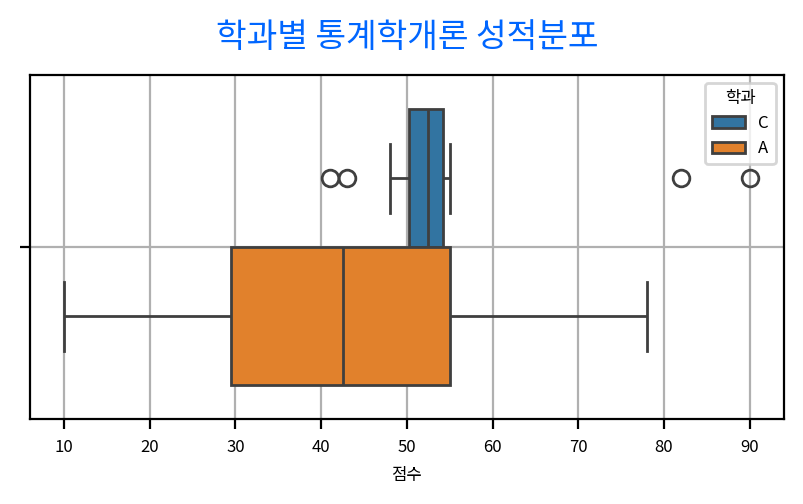

In [14]:
# 1. 그래프 초기화
width_px=800
height_px=500
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.boxplot(data=origin, x='점수', hue='학과')

# 3. 그래프 꾸미기
ax.grid(True)
ax.set_title('학과별 통계학개론 성적분포', color='#0066ff', fontsize=12, fontweight=1000, pad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실

1. C 학과에는 12개의 자료 중에 이상치가 4개나 존재하기에, 신뢰성 있는 자료로 보기 어렵다.
2. C 학과의 최저점이 A 학과의 평균 정도인 것을 보아, C 학과의 전반적인 학업 성취도가 A 학과보다 높다는 것을 알 수 있다.

## 🌱 문제 5

stat_comp_grade 데이터셋은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.
2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는사실을 하나 이상 제시하라.
3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.
4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

In [15]:
origin=load_data('stat_comp_grade')
origin.head()

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78


In [16]:
df=origin.copy()
df.loc[df['전공']=='STAT','전공']=1
df.loc[df['전공']=='COMP','전공']=2
df=df.astype({'전공':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   전공      20 non-null     category
 1   중간고사    20 non-null     int64   
 2   기말고사    20 non-null     int64   
dtypes: category(1), int64(2)
memory usage: 596.0 bytes


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
중간고사,20.0,65.15,19.647619,31.0,48.5,67.5,78.50,94.0
기말고사,20.0,75.65,15.597824,40.0,66.0,79.0,85.25,96.0


### 🎈 알 수 있는 사실 1

1. 중간고사와 비교하여 기말고사 때에 평균이 상승하고 표준편차가 낮아진 것을 보아, 학생들의 전반적인 성적 향상을 엿볼 수 있다.

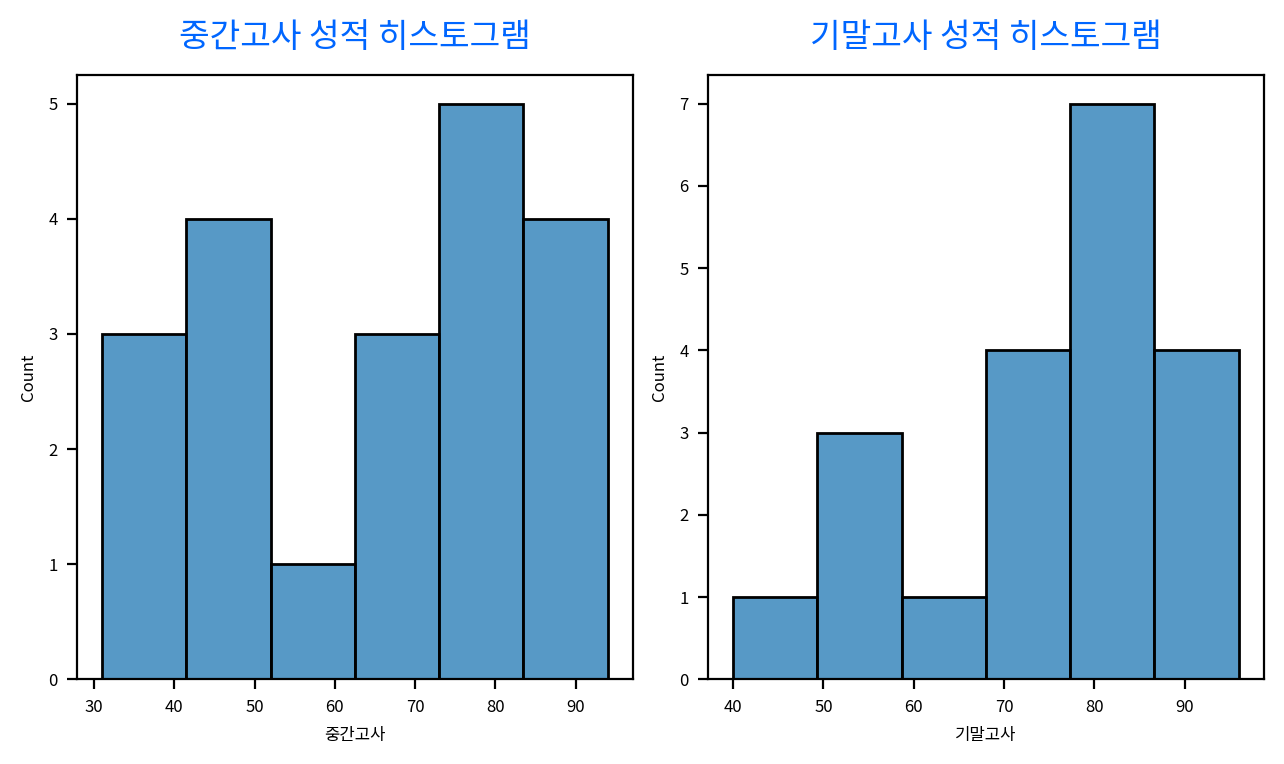

In [18]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, (ax1,ax2)=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.histplot(data=df, x='중간고사', ax=ax1)
sb.histplot(data=df, x='기말고사', ax=ax2)

# 3. 그래프 꾸미기
ax1.set_title('중간고사 성적 히스토그램', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
ax2.set_title('기말고사 성적 히스토그램', color='#0066ff', fontsize=12, fontweight=1000, pad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실 2

1. 중간고사 때에는 히스토그램 분포가 쌍봉형을 보여주는 데에 반해, 기말고사 때에는 우편향된 모습을 보여주고 있다.
2. 이를 통해 전반적인 학생들의 성적 분포가 향상되었음을 알 수 있다.

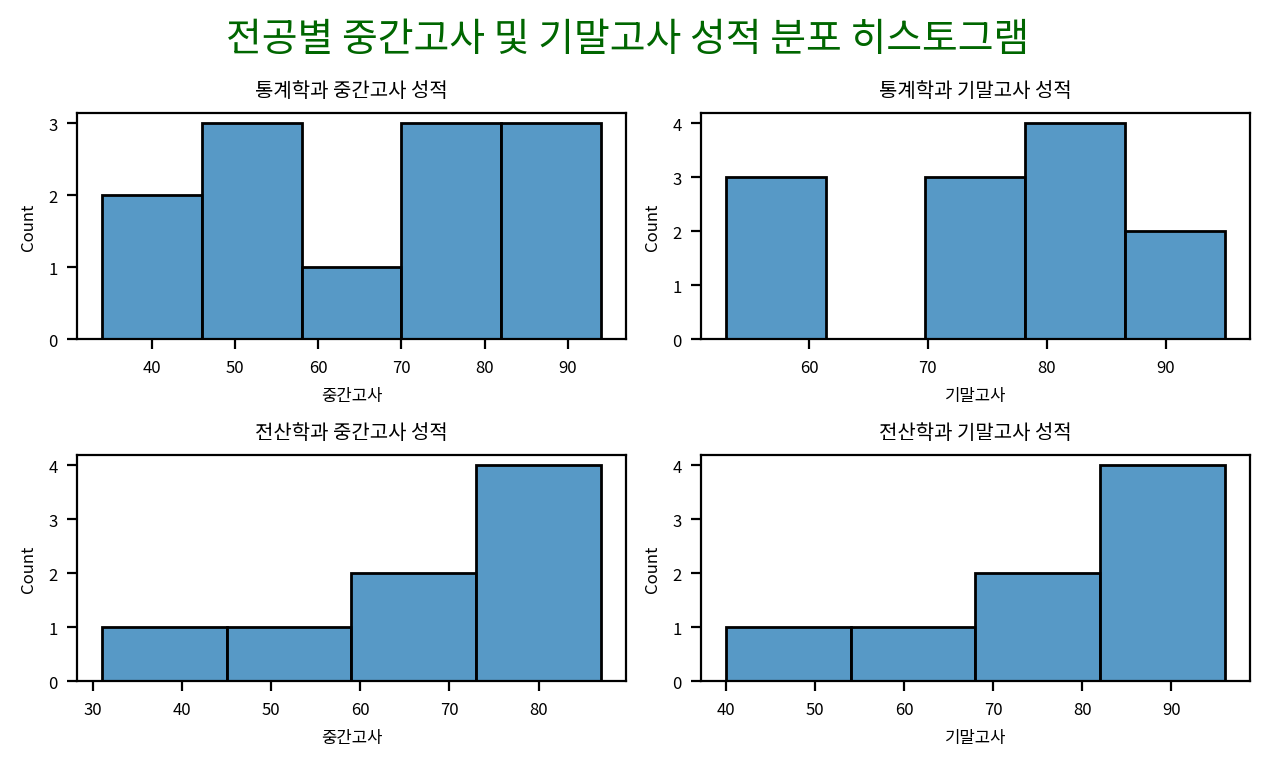

In [19]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=2
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.histplot(data=df[df['전공']==1], x='중간고사', ax=ax[0][0])
sb.histplot(data=df[df['전공']==1], x='기말고사', ax=ax[0][1])
sb.histplot(data=df[df['전공']==2], x='중간고사', ax=ax[1][0])
sb.histplot(data=df[df['전공']==2], x='기말고사', ax=ax[1][1])

# 3. 그래프 꾸미기
fig.suptitle('전공별 중간고사 및 기말고사 성적 분포 히스토그램', fontsize=14, color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

ax[0][0].set_title('통계학과 중간고사 성적')
ax[0][1].set_title('통계학과 기말고사 성적')
ax[1][0].set_title('전산학과 중간고사 성적')
ax[1][1].set_title('전산학과 기말고사 성적')

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실 3

1. 통계학과에 비해 전산학과는 중간고사 때와 기말고사 때 모두 음의 비대칭 형태를 띄고 있는 것으로 보아, 학생들의 전반적인 학업 성취도는 통계학과보다 전산학과가 더 높은 것을 알 수 있다.

# ⭐ 집단별 요약

## 🌱 문제 6

senior_lsf 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터 일부이다.

복지시설이 많은 상위10개 지역에 대한 지역별 복지 시설 수를 시각화 하고, 이 결과를 알 수 있는 개관적 사실을 하나 이상 서술하시오.

In [20]:
origin=load_data('senior_lsf')
origin.head()

[data] https://data.hossam.kr/data/lab06/senior_lsf.xlsx
[desc] 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터
[!] Cannot read metadata


,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103


In [21]:
df=origin.sort_values('복지시설',ascending=False)
df.head(10)

,지역명,복지시설
10,Nowon-gu,252
15,Gangseo-gu,215
18,Yeongdeungpo-gu,208
14,Yangcheon-gu,192
16,Guro-gu,192
22,Gangnam-gu,184
23,Songpa-gu,173
13,Mapo-gu,160
7,Seongbuk-gu,158
3,Seongdong-gu,155


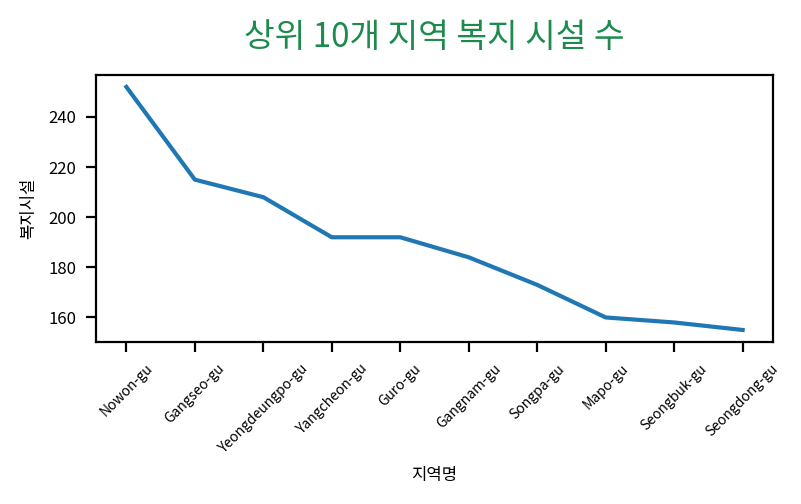

In [22]:
# 1. 그래프 초기화
width_px=800
height_px=500
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.lineplot(data=df.head(10), x='지역명', y='복지시설')

# 3. 그래프 꾸미기
ax.set_title('상위 10개 지역 복지 시설 수', color="#1d8b4e", fontsize=12, fontweight=1000, pad=10)
ax.set_xticks(list(df.head(10)['지역명']), list(df.head(10)['지역명']), rotation=45, fontsize=5)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실

1. 가장 많은 복지시설을 가진 구인 노원구를 제외하고 상위 4개 지역은 서울의 서쪽에 위치하고 있다.
2. 다른 지역에 비해 노원구의 복지 시설이 많이 분포해 있는 것을 보아, 노원구에서의 복지시설 이용률이 높다는 것을 알 수 있다.

## 🌱 문제 7

jobs_by_scale 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

In [23]:
origin=load_data('jobs_by_scale')
origin.head()

[data] https://data.hossam.kr/data/lab06/jobs_by_scale.xlsx
[desc] 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7


In [24]:
df=origin.melt(id_vars=['종사자규모별'],var_name='년도',value_name='업체수')
df

,종사자규모별,년도,업체수
0,1~4명,2015,553.5
1,5~9명,2015,211.6
2,10~29명,2015,194.7
3,30~49명,2015,227.4
4,50~99명,2015,152.8
5,100~199명,2015,221.9
6,200~299명,2015,80.9
7,300~999명,2015,100.5
8,1000명 이상,2015,557.6
9,1~4명,2016,576.7


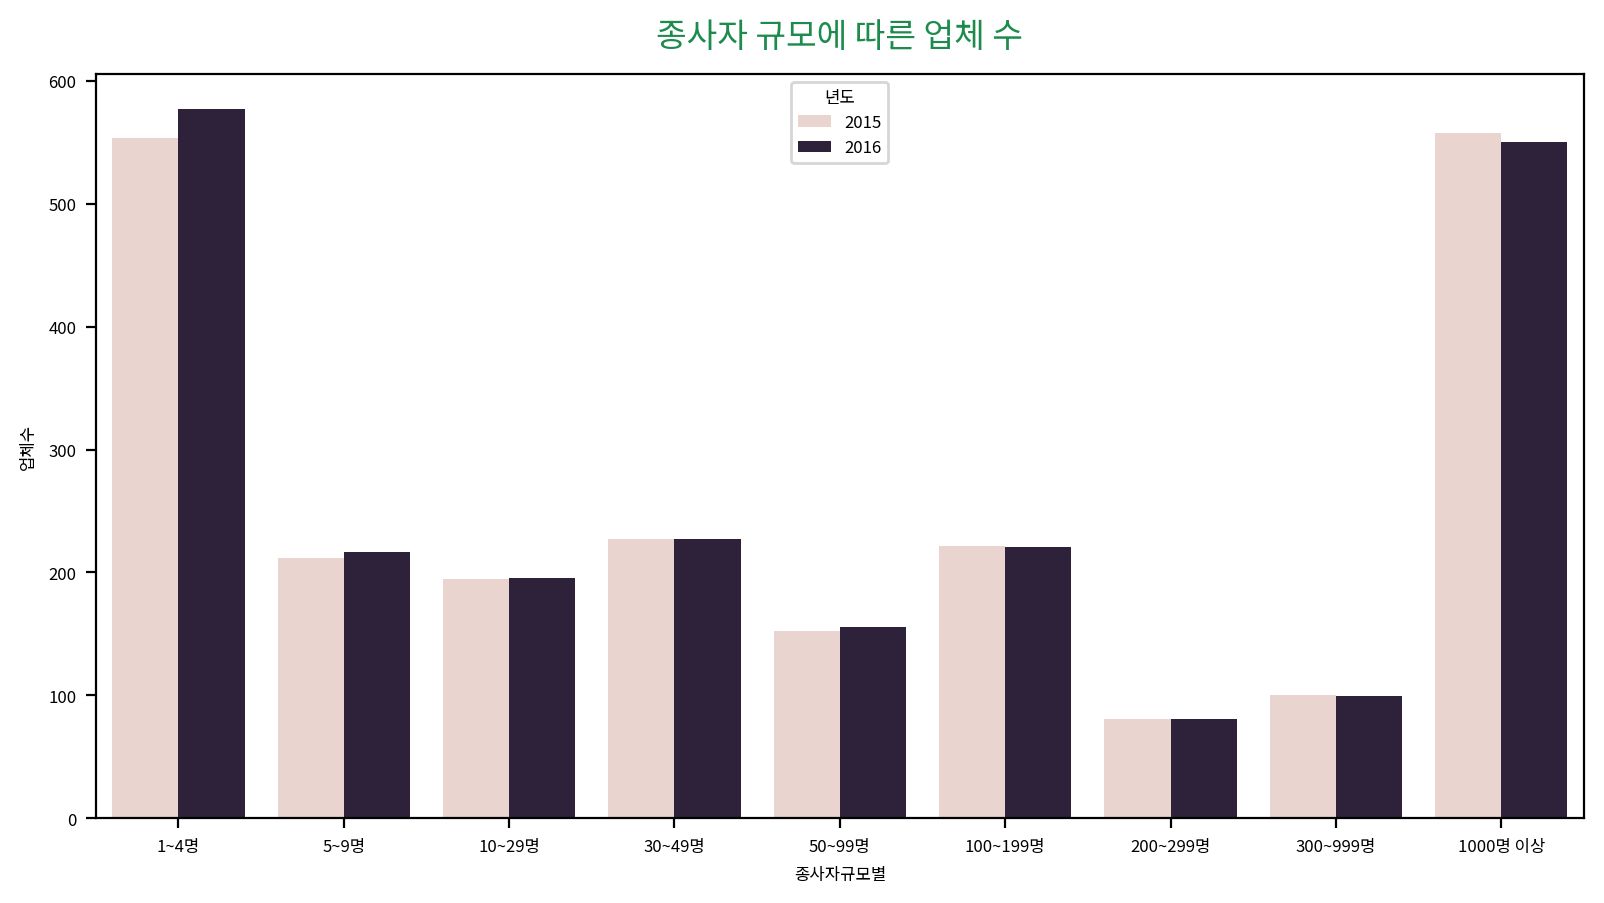

In [25]:
# 1. 그래프 초기화
width_px=1600
height_px=900
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.barplot(data=df, x='종사자규모별', y='업체수', hue='년도')

# 3. 그래프 꾸미기
ax.set_title('종사자 규모에 따른 업체 수', color="#1d8b4e", fontsize=12, fontweight=1000, pad=10)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

### 🎈 알 수 있는 사실

1. 10명에서 999명 사이의 종사자를 가진 업체들은 2015년에서 2016년으로 진행됨에 따라 크게 변화하지 않았다.
2. 1~4명 사이의 극소규모 종사자를 가진 업체는 2015년보다 2016년도에 늘어났다.
3. 1000명 이상의 종사자를 가진 대규모 업체는 2015년보다 2016년도에 줄어들었다.

# ⭐ 서브플롯

covid19_full 데이터는 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 기록한 데이터이다.

아래의 내용을 모두 반영한 그래프를 생성하세요.

1. 데이터 프레임을 생성하는 과정에서 인덱스를 지정하지 마시오.
2. 사용자로부터 날짜를 'yyyymmdd'의 8자리 문자열로 입력받은 후, 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
3. 2행 1열의 서브플롯을 만들고, 각각의 그래프 영역에 대한 twinx를 생성하시오.
4. 첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
5. 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.
6. 누적 확진자는 y축을 왼쪽으로 설정한 막대 그래프로 표시하고, 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성하시오.

In [26]:
origin=load_data('covid19_full')
origin.head()

[data] https://data.hossam.kr/data/lab06/covid19_full.xlsx
[desc] 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 일단위로 기록한 실제 데이터 (자체수집)
[!] Cannot read metadata


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784


In [27]:
y=input('날짜를 입력하세요[yyyymmdd 형식]')
df=origin.copy()
df=df[(df['날짜']>=dt.strftime(dt.strptime(y,'%Y%m%d'),'%Y-%m-%d')) & (df['날짜']<=dt.strftime(dt.strptime(y,'%Y%m%d')+timedelta(6),'%Y-%m-%d'))]
df=df.sort_values('날짜',ascending=True)
df

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
30,2023-05-01,6078397,1112.0,0,NaN,NaN,6425,2.0,31176660.0,5774.0,0,NaN,8.0,34487
29,2023-05-02,6082360,3963.0,0,NaN,NaN,6428,3.0,31192401.0,15741.0,0,NaN,10.0,34497
28,2023-05-03,6087497,5137.0,0,NaN,NaN,6429,1.0,31212598.0,20197.0,0,NaN,8.0,34505
27,2023-05-04,6092424,4927.0,0,NaN,NaN,6432,3.0,31232744.0,20146.0,0,NaN,7.0,34512
26,2023-05-05,6097034,4650.0,0,NaN,NaN,6433,1.0,31251203.0,18752.0,0,NaN,6.0,34518
25,2023-05-06,6099419,2385.0,0,NaN,NaN,6434,1.0,31263004.0,11801.0,0,NaN,3.0,34521
24,2023-05-07,6103182,3763.0,0,NaN,NaN,6436,2.0,31277746.0,14742.0,0,NaN,6.0,34527


In [28]:
df=df.reset_index(drop=True)
for i in range(0,len(df)):
    df.loc[i,'날짜']=dt.strftime(dt.strptime(df.loc[i,'날짜'],'%Y-%m-%d'),'%m.%d')
df

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,05.01,6078397,1112.0,0,NaN,NaN,6425,2.0,31176660.0,5774.0,0,NaN,8.0,34487
1,05.02,6082360,3963.0,0,NaN,NaN,6428,3.0,31192401.0,15741.0,0,NaN,10.0,34497
2,05.03,6087497,5137.0,0,NaN,NaN,6429,1.0,31212598.0,20197.0,0,NaN,8.0,34505
3,05.04,6092424,4927.0,0,NaN,NaN,6432,3.0,31232744.0,20146.0,0,NaN,7.0,34512
4,05.05,6097034,4650.0,0,NaN,NaN,6433,1.0,31251203.0,18752.0,0,NaN,6.0,34518
5,05.06,6099419,2385.0,0,NaN,NaN,6434,1.0,31263004.0,11801.0,0,NaN,3.0,34521
6,05.07,6103182,3763.0,0,NaN,NaN,6436,2.0,31277746.0,14742.0,0,NaN,6.0,34527


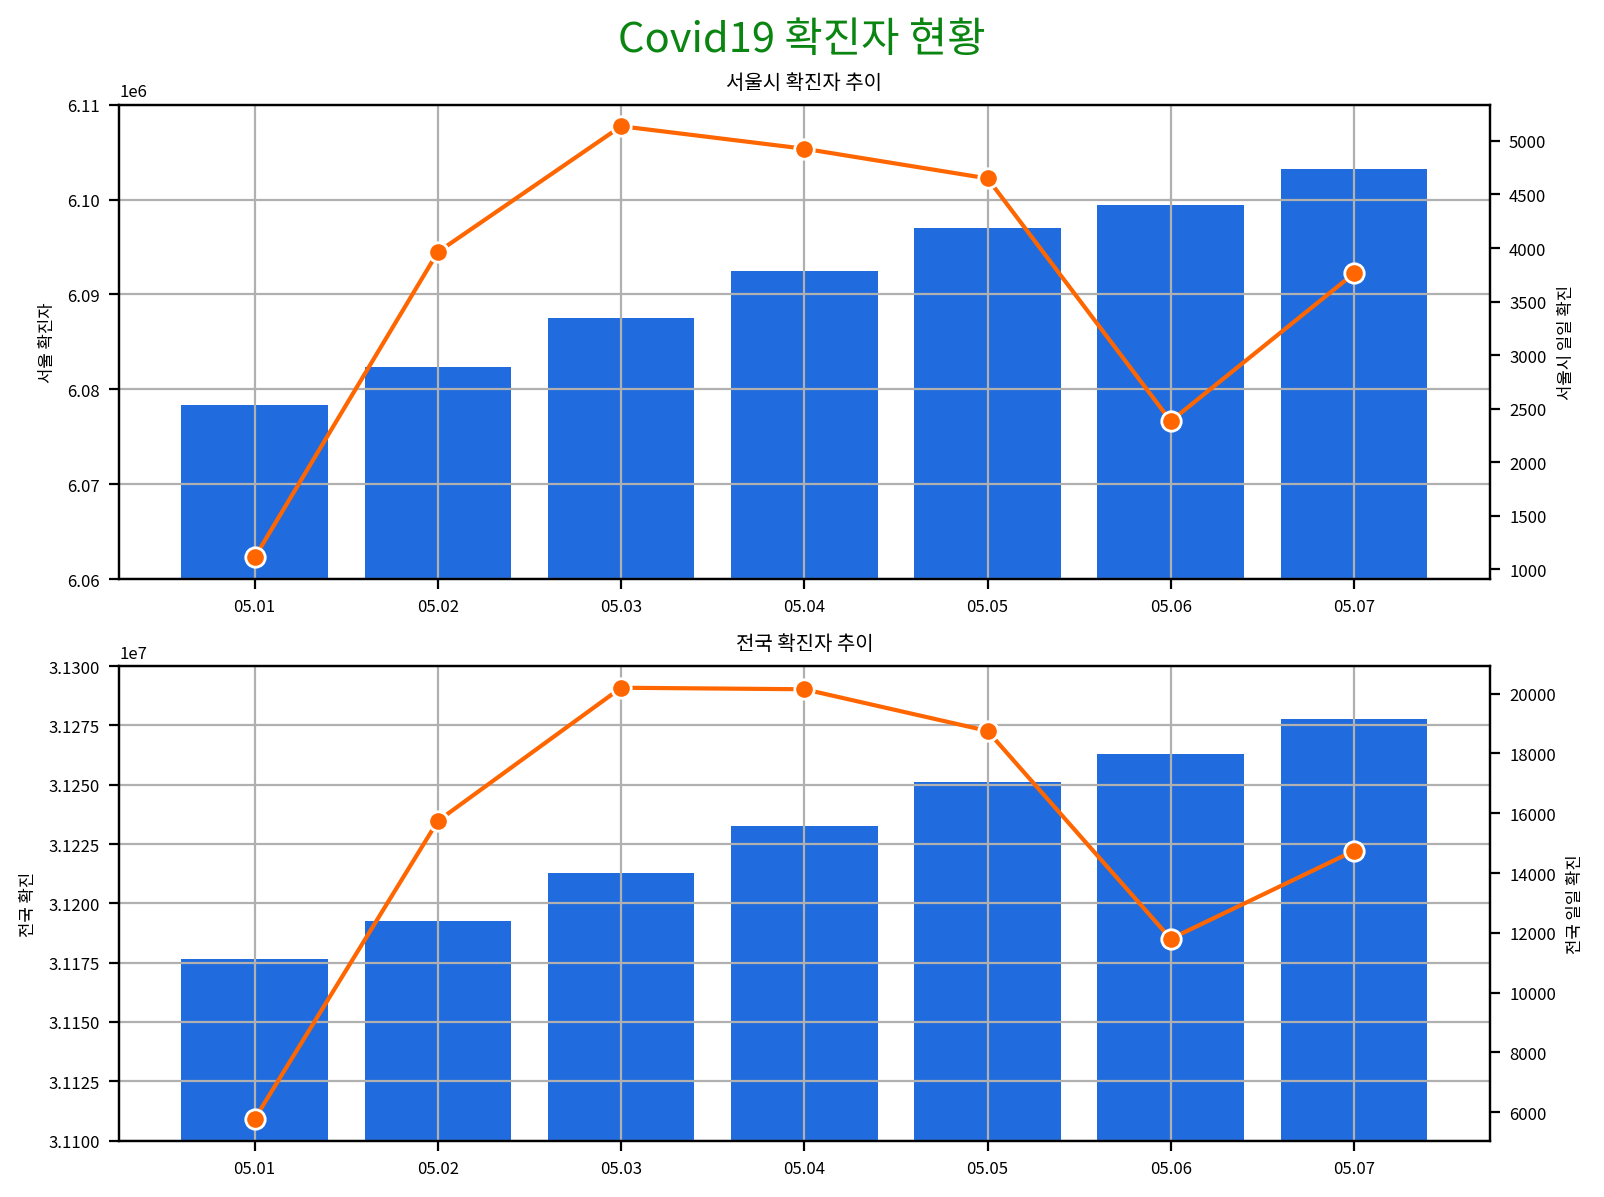

In [29]:
width_px=1600
height_px=1200
rows=2
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, (ax1,ax3) =plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

ax2=ax1.twinx()
ax4=ax3.twinx()

sb.barplot(data=df, x='날짜', y='서울시 누적 확진자', color='#0066ff', ax=ax1)
sb.lineplot(data=df, x='날짜', y='서울시 일일 확진', color='#ff6600', marker='o', markersize=7, markerfacecolor='#ff6600', markeredgecolor='#ffffff',markeredgewidth=1, ax=ax2)
sb.barplot(data=df, x='날짜', y='전국 누적 확진', color='#0066ff', ax=ax3)
sb.lineplot(data=df, x='날짜', y='전국 일일 확진', color='#ff6600', marker='o', markersize=7, markerfacecolor='#ff6600', markeredgecolor='#ffffff',markeredgewidth=1, ax=ax4)

fig.suptitle('Covid19 확진자 현황', fontsize=15, color="#0B8511")
fig.subplots_adjust(wspace=0.5, hspace=0.5)

ax1.set_title('서울시 확진자 추이')
ax1.set_xlabel('')
ax1.set_ylabel('서울 확진자')
ax2.set_ylabel('서울시 일일 확진')
ax1.grid(True)
ax1.set_ylim([6060000,6110000])

ax3.set_title('전국 확진자 추이')
ax3.set_xlabel('')
ax3.set_ylabel('전국 확진')
ax4.set_ylabel('전국 일일 확진')
ax3.grid(True)
ax3.set_ylim([31100000,31300000])

plt.tight_layout()
plt.show()
plt.close()

# ⭐ ADsP 기출 데이터셋 활용

mpg 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다.

In [30]:
origin=load_data('mpg')
origin.head()

[data] https://data.hossam.kr/data/lab06/mpg.xlsx
[desc] 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터 (출처: ADsP 기출 / R 내장 데이터)

field         description
------------  ----------------------------------------------------
manufacturer  자동차 제조사
model         자동차 모델명
displ         자동차 배기량
year          제조년도
cyl           엔진 실린더 수
trans         자동차 트랜스미션 종류
drv           자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동
cty           도심 연비 (마일/갤론)
hwy           고속도로 연비 (마일/갤론)
fl            연료 종류
class         자동차 분류



,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 🌱 문제 1

자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

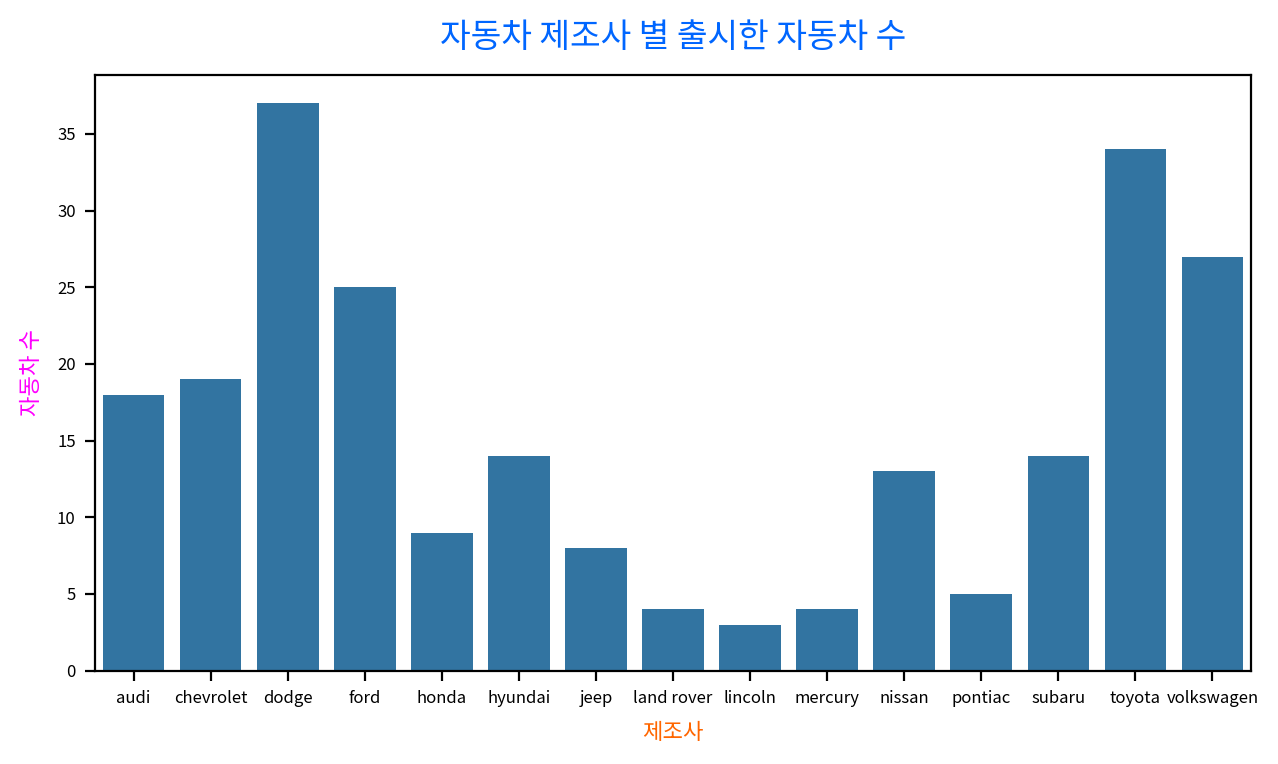

In [56]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.countplot(data=origin, x='manufacturer')

# 3. 그래프 꾸미기
# ax.grid(True)
ax.set_title('자동차 제조사 별 출시한 자동차 수', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
ax.set_xlabel('제조사', color='#ff6600', fontsize=8, labelpad=5)
ax.set_ylabel('자동차 수', color='#ff00ff', fontsize=8, labelpad=5)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🌱 문제 2

자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

In [57]:
df=origin.filter(['manufacturer','year'])
df

,manufacturer,year
0,audi,1999
1,audi,1999
2,audi,2008
3,audi,2008
4,audi,1999
...,...,...
229,volkswagen,2008
230,volkswagen,2008
231,volkswagen,1999
232,volkswagen,1999


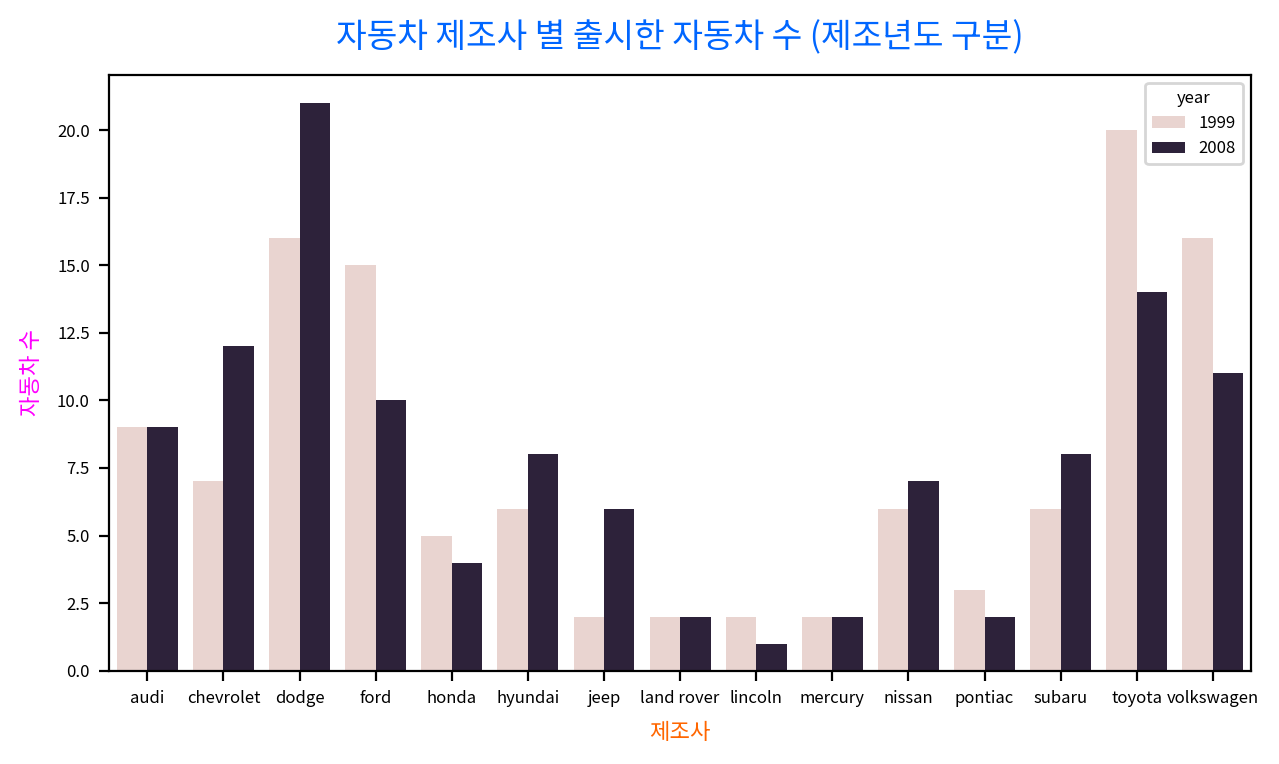

In [60]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.countplot(data=df, x='manufacturer', hue='year')

# 3. 그래프 꾸미기
# ax.grid(True)
ax.set_title('자동차 제조사 별 출시한 자동차 수 (제조년도 구분)', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
ax.set_xlabel('제조사', color='#ff6600', fontsize=8, labelpad=5)
ax.set_ylabel('자동차 수', color='#ff00ff', fontsize=8, labelpad=5)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🌱 문제 3

구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

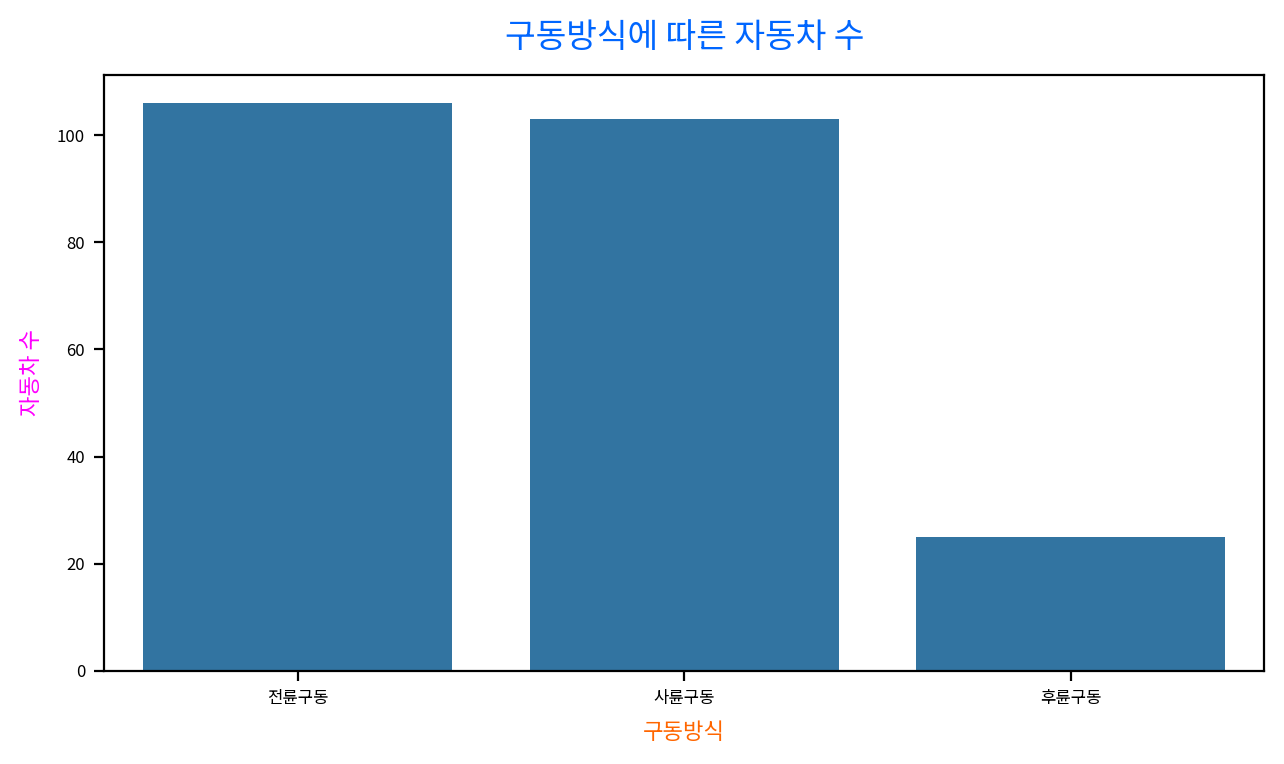

In [61]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.countplot(data=origin, x='drv')

# 3. 그래프 꾸미기
# ax.grid(True)
ax.set_title('구동방식에 따른 자동차 수', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
ax.set_xlabel('구동방식', color='#ff6600', fontsize=8, labelpad=5)
ax.set_ylabel('자동차 수', color='#ff00ff', fontsize=8, labelpad=5)
ax.set_xticks(['f','4','r'],['전륜구동', '사륜구동', '후륜구동'])

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🌱 문제 4

자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

In [203]:
df=origin.filter(['drv','cty'])
df

,drv,cty
0,f,18
1,f,21
2,f,20
3,f,21
4,f,16
...,...,...
229,f,19
230,f,21
231,f,16
232,f,18


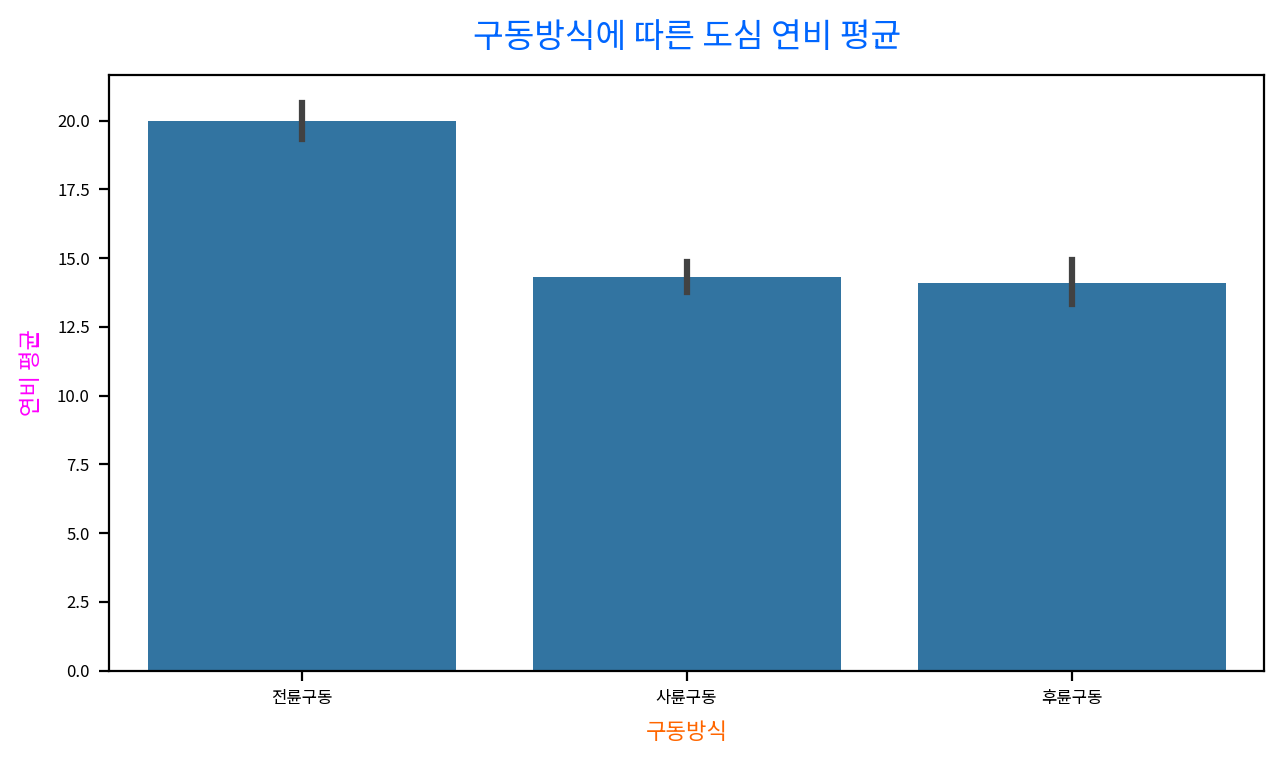

In [204]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=1
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.barplot(data=df, x='drv', y='cty', estimator=np.mean, errorbar=('ci',95))

# 3. 그래프 꾸미기
# ax.grid(True)
ax.set_title('구동방식에 따른 도심 연비 평균', color='#0066ff', fontsize=12, fontweight=1000, pad=10)
ax.set_xlabel('구동방식', color='#ff6600', fontsize=8, labelpad=5)
ax.set_ylabel('연비 평균', color='#ff00ff', fontsize=8, labelpad=5)
ax.set_xticks(['f','4','r'],['전륜구동', '사륜구동', '후륜구동'])

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🌱 문제 5

자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

In [104]:
df=origin.filter(['manufacturer','cty','hwy'])
df

,manufacturer,cty,hwy
0,audi,18,29
1,audi,21,29
2,audi,20,31
3,audi,21,30
4,audi,16,26
...,...,...,...
229,volkswagen,19,28
230,volkswagen,21,29
231,volkswagen,16,26
232,volkswagen,18,26


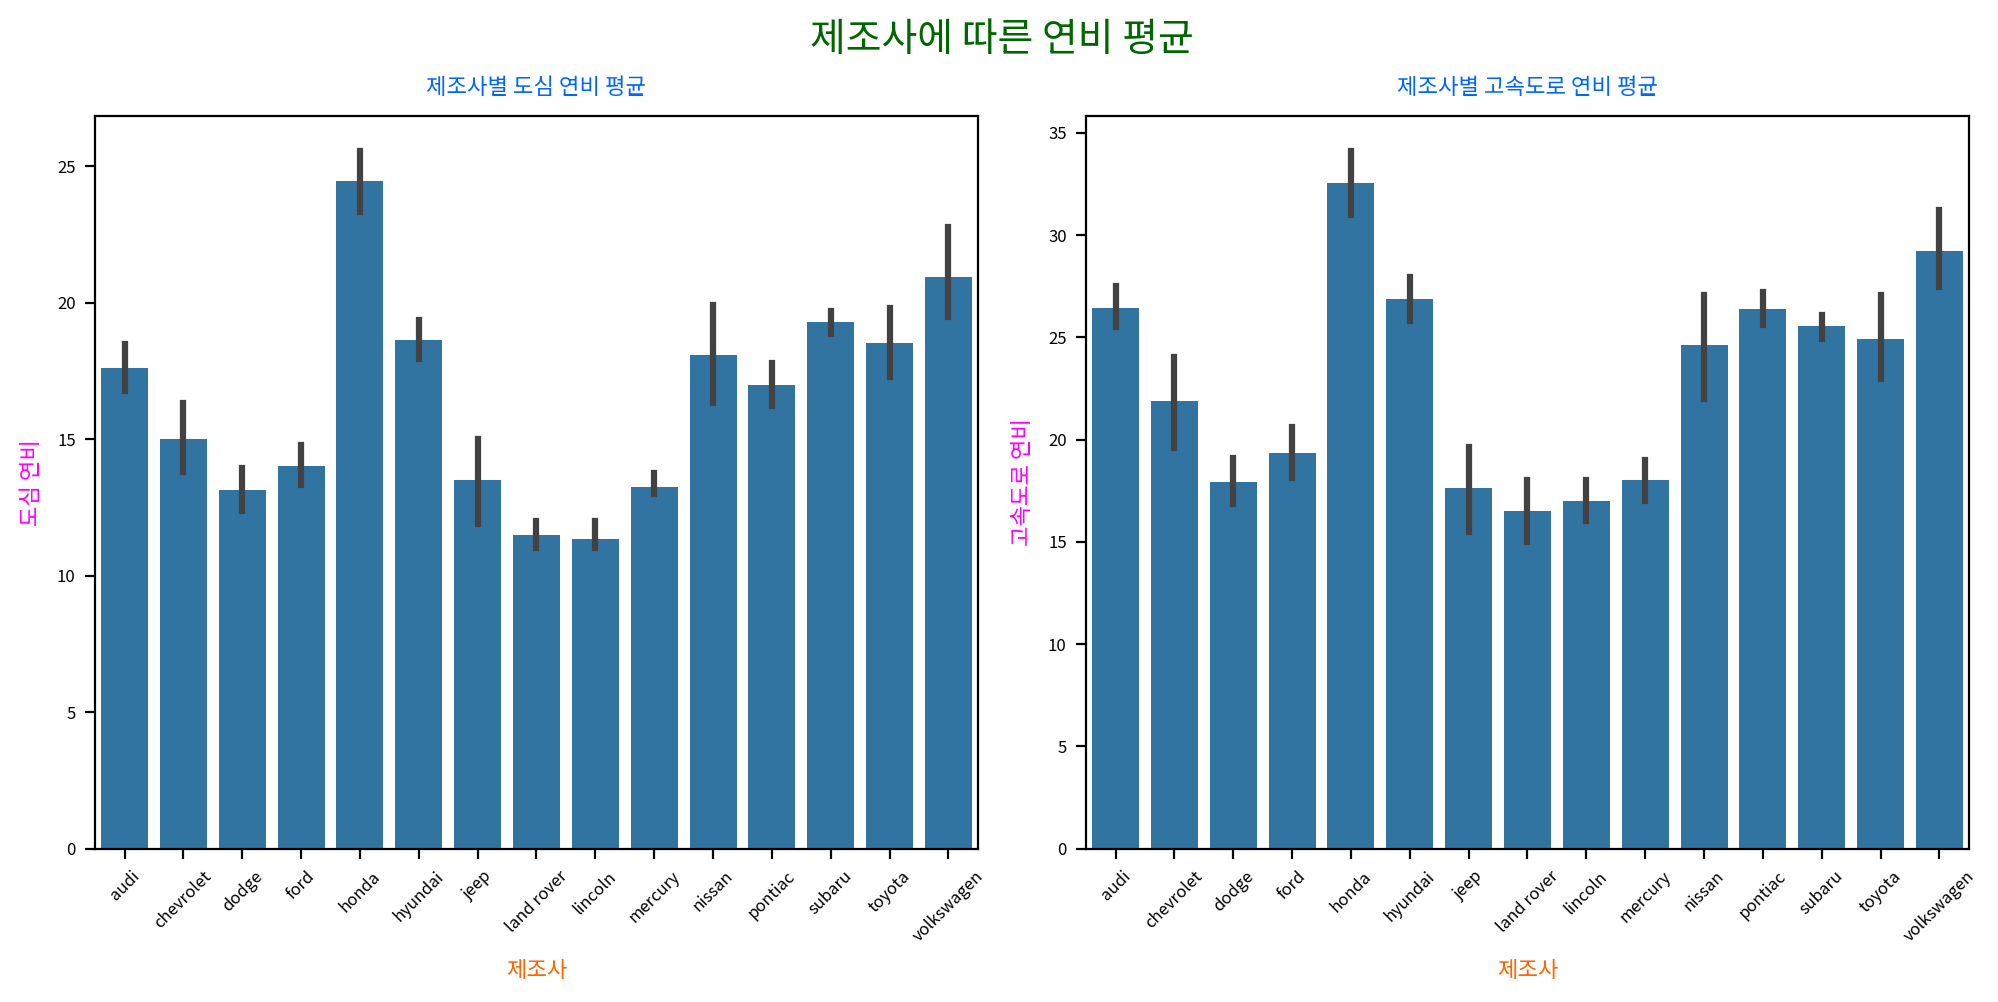

In [106]:
# 1. 그래프 초기화
width_px=2000
height_px=1000
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.barplot(data=df, x='manufacturer', y='cty', estimator=np.mean, ax=ax[0])
sb.barplot(data=df, x='manufacturer', y='hwy', estimator=np.mean, ax=ax[1])

# 3. 그래프 꾸미기
fig.suptitle('제조사에 따른 연비 평균',fontsize=14,color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

ax[0].set_title('제조사별 도심 연비 평균', color='#0066ff', fontsize=8, pad=8)
# ax[0].grid()
ax[0].set_xticks(list(df['manufacturer'].unique()),list(df['manufacturer'].unique()),rotation=45)
ax[0].set_xlabel('제조사', color='#ff6600', fontsize=8, labelpad=5)
ax[0].set_ylabel('도심 연비', color='#ff00ff', fontsize=8, labelpad=5)

ax[1].set_title('제조사별 고속도로 연비 평균', color='#0066ff', fontsize=8, pad=8)
# ax[1].grid()
ax[1].set_xticks(list(df['manufacturer'].unique()),list(df['manufacturer'].unique()),rotation=45)
ax[1].set_xlabel('제조사', color='#ff6600', fontsize=8, labelpad=5)
ax[1].set_ylabel('고속도로 연비', color='#ff00ff', fontsize=8, labelpad=5)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🌱 문제 6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브 플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.

In [129]:
df=origin.filter(['displ','cty','hwy'])
df

,displ,cty,hwy
0,1.8,18,29
1,1.8,21,29
2,2.0,20,31
3,2.0,21,30
4,2.8,16,26
...,...,...,...
229,2.0,19,28
230,2.0,21,29
231,2.8,16,26
232,2.8,18,26


In [130]:
z1=np.polyfit(df['displ'], df['cty'], 1)
z2=np.polyfit(df['displ'], df['hwy'], 1)

f1=np.poly1d(z1)
f2=np.poly1d(z2)

x1=df['displ']
y1=f1(x1)
x2=df['displ']
y2=f2(x2)

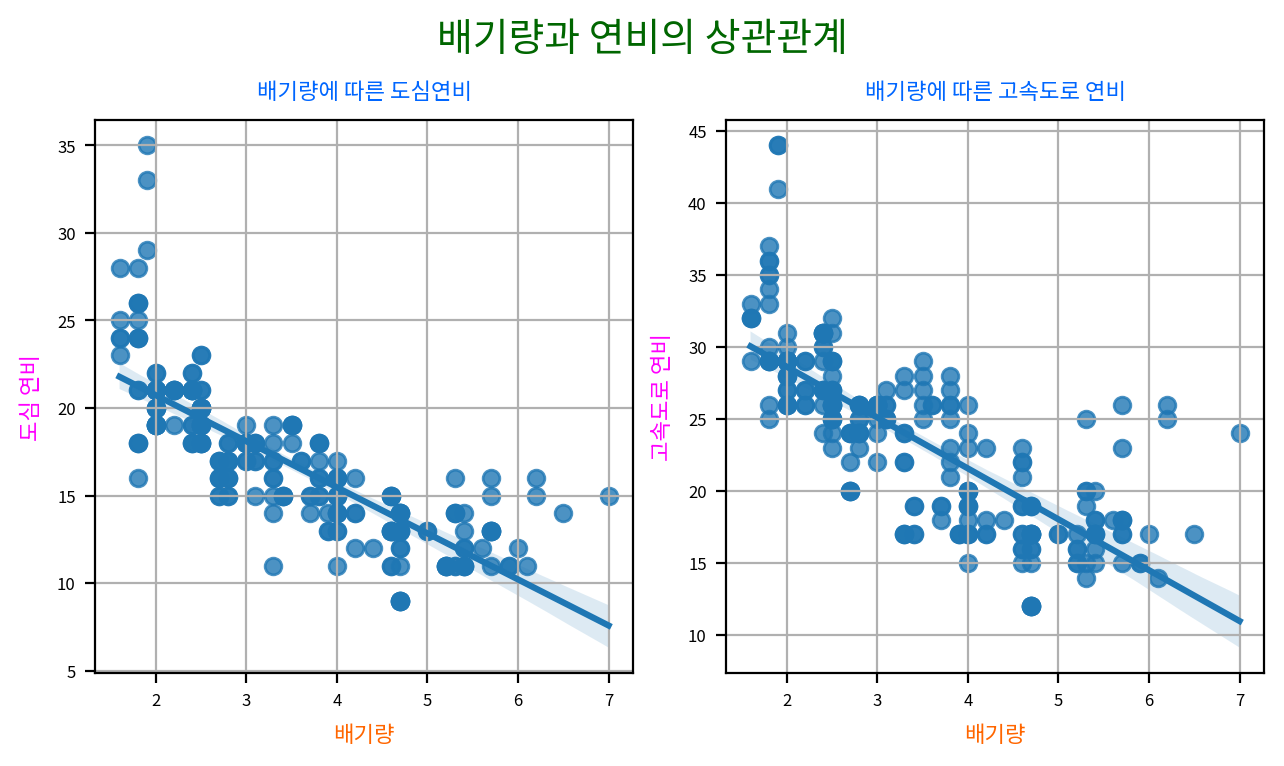

In [133]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=2
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기
sb.regplot(data=df, x='displ', y='cty', ax=ax[0])
# sb.scatterplot(data=df, x='displ', y='cty', ax=ax[0])
# sb.lineplot(x=x1, y=y1, color='#e4a00c', linestyle='--', ax=ax[0])
sb.regplot(data=df, x='displ', y='hwy', ax=ax[1])
# sb.scatterplot(data=df, x='displ', y='hwy', ax=ax[1])
# sb.lineplot(x=x2, y=y2, color='#e4a00c', linestyle='--', ax=ax[1])

# 3. 그래프 꾸미기
fig.suptitle('배기량과 연비의 상관관계',fontsize=14,color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

ax[0].set_title('배기량에 따른 도심연비', color='#0066ff', fontsize=8, pad=8)
ax[0].grid()
ax[0].set_xlabel('배기량', color='#ff6600', fontsize=8, labelpad=5)
ax[0].set_ylabel('도심 연비', color='#ff00ff', fontsize=8, labelpad=5)

ax[1].set_title('배기량에 따른 고속도로 연비', color='#0066ff', fontsize=8, pad=8)
ax[1].grid()
ax[1].set_xlabel('배기량', color='#ff6600', fontsize=8, labelpad=5)
ax[1].set_ylabel('고속도로 연비', color='#ff00ff', fontsize=8, labelpad=5)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()

## 🌱 문제 7

철수는 새로 자동차를 구입하고자 한다.  
철수가 고려하는 가장 중요한 조건은 연비이다.  
철수는 자동차의 평균 연비를 고속도로 연비와 도심연비에 대한 평균으로 계산하기로 하고 이를 확인하기 위해 전체 자동차에 대한 평균연비를 구한 후 이 값보다 높은 연비를 갖는 자동차의 경우 Pass를, 그렇지 않은 경우 Fail로 구분하기로 했다.

1. Pass 등급과 Fail 등급의 비율을 시각화 하라.
2. Pass 등급과 Fail 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.
3. Pass 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라 (전처리 과정에서 발생하는 결측치는 모두 삭제하고 같은 모델에 대해서는 평균값을 사용한다.)

위의 세가지 조건을 만족하는 1행 3열의 서브플롯을 생성하시오.

In [180]:
df=origin.copy()

# 자동차 연비 구하기
df['fuel_efficiency']=(df['cty']+df['hwy'])/2
cty_mean=df['cty'].mean()
hwy_mean=df['hwy'].mean()
entire_fuel_efficiency=(cty_mean+hwy_mean)/2

# 패논패 설정
for i in range(0,len(df)):
    if df.loc[i, 'fuel_efficiency'] > entire_fuel_efficiency:
        df.loc[i, 'PF']='Pass'
    else:
        df.loc[i, 'PF']='Fail'

df=df.dropna(subset=['PF'])
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency,PF
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,Pass


In [192]:
df1=df[df['PF']=='Pass'].filter(['model','fuel_efficiency']).groupby('model').mean().sort_values('fuel_efficiency', ascending=False)
df1

,fuel_efficiency
model,
corolla,29.800000
civic,28.500000
new beetle,28.416667
jetta,25.875000
altima,24.666667
camry,24.071429
camry solara,24.000000
gti,23.700000
a4,23.571429


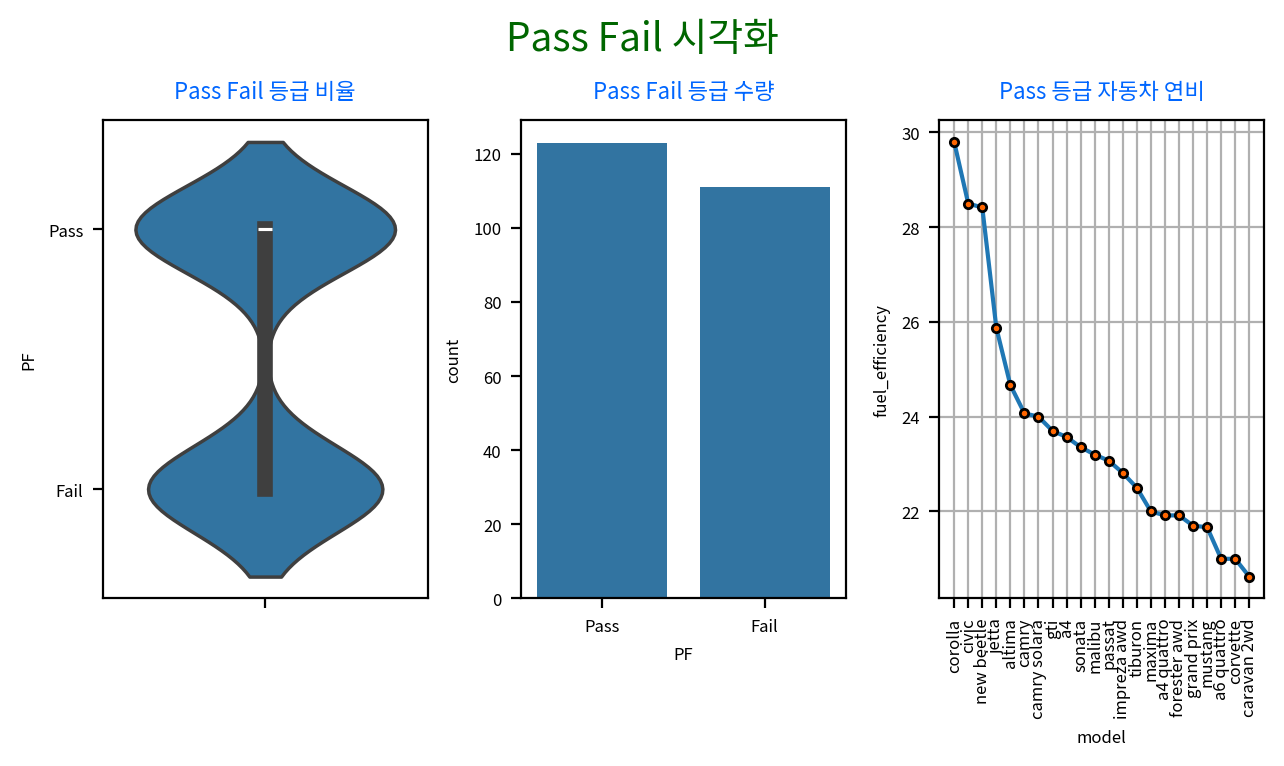

In [202]:
# 1. 그래프 초기화
width_px=1280
height_px=760
rows=1
cols=3
figsize=(width_px/my_dpi, height_px/my_dpi)
fig, ax=plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2. 그래프 그리기

sb.violinplot(data=df, y='PF', ax=ax[0])
sb.countplot(data=df, x='PF', ax=ax[1])
sb.lineplot(data=df1, x='model', y='fuel_efficiency', marker='o', markersize=3, markerfacecolor='#ff6600', markeredgecolor='#000000',markeredgewidth=1 , ax=ax[2])

# 3. 그래프 꾸미기
fig.suptitle('Pass Fail 시각화',fontsize=14,color='#006600')

ax[0].set_title('Pass Fail 등급 비율', color='#0066ff', fontsize=8, pad=8)
ax[1].set_title('Pass Fail 등급 수량', color='#0066ff', fontsize=8, pad=8)
ax[2].set_title('Pass 등급 자동차 연비', color='#0066ff', fontsize=8, pad=8)

ax[2].set_xticks(df1.index,df1.index,rotation=90)
ax[2].grid(True)

# 4. 출력
plt.tight_layout()
# plt.savefig('myplot.png',dpi=my_dpi)
plt.show()
plt.close()